In [1]:
import torch
import sys
import os
sys.path.append('../vega/')
import vega
import scanpy as sc
import scvi
from scipy import sparse
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib
path_to_save = '../paper/figures/l1_regularization/'
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
font = {'family' : 'Arial',
        'size'   : 14}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = .5
matplotlib.rcParams['lines.linewidth'] = .5
matplotlib.rcParams['patch.linewidth'] = .5
matplotlib.rcParams['axes.grid'] = False
matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
# Scanpy figures params
sc.set_figure_params(dpi_save=300)
sc.settings.figdir = path_to_save

GENES TO RECOVER FROM IFN-ALPHA/BETA
{'ISG20', 'IFIT2', 'ISG15'}
Loading model with lambda=0.1
Using L1-regularized decoder
Constraining decoder to positive weights
Model successfully loaded.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


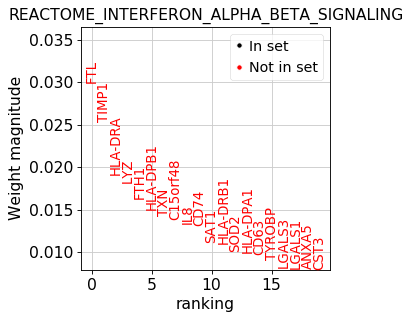

Loading model with lambda=1.0
Using L1-regularized decoder
Constraining decoder to positive weights
Model successfully loaded.


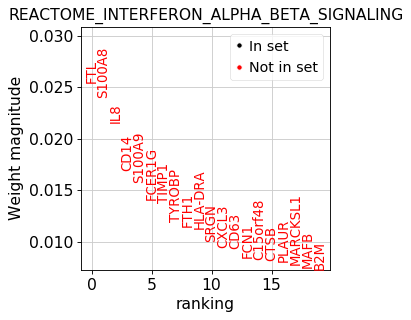

Loading model with lambda=10.0
Using L1-regularized decoder
Constraining decoder to positive weights
Model successfully loaded.


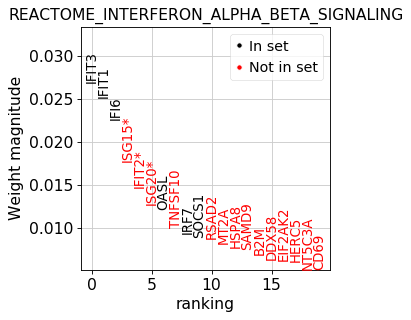

Loading model with lambda=100.0
Using L1-regularized decoder
Constraining decoder to positive weights
Model successfully loaded.


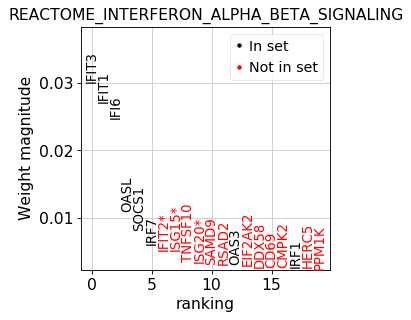

Loading model with lambda=1000.0
Using L1-regularized decoder
Constraining decoder to positive weights
Model successfully loaded.


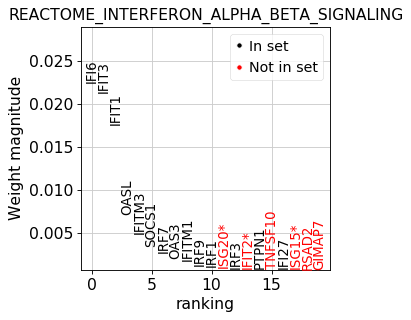

In [2]:
list_dir = os.listdir('../trained_models/kang_l1/')
# Removed genes
dict_p = vega.utils._read_gmt('../data/reactomes.gmt')
dict_p_rm = vega.utils._read_gmt('../data/reactomes_ifna_3_rm.gmt')
rm_genes = set(dict_p['REACTOME_INTERFERON_ALPHA_BETA_SIGNALING'])-set(dict_p_rm['REACTOME_INTERFERON_ALPHA_BETA_SIGNALING'])
print('GENES TO RECOVER FROM IFN-ALPHA/BETA')
print('==========================')
print(rm_genes)
print('==========================')
for d in list_dir:
    l1 = float(d.split('_')[-1])
    print('Loading model with lambda=%.1f'%(l1))
    print('==========================')
    model = vega.VEGA.load('../trained_models/kang_l1/'+d+'/', reg_kwargs={'lambda1':l1, 'lr':1e-4})
    vega.plotting.rank_gene_weights(model,
                                    gmv_list=['REACTOME_INTERFERON_ALPHA_BETA_SIGNALING'],
                                    color_in_set=True,
                                    n_genes=20, star_names=list(rm_genes),
                                    fontsize=12,
                                    save=path_to_save+'rank_lambda_%.1f.pdf'%(l1))